In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [60]:
job="data_analyst"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [61]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,VWorker Solutions India Pvt Ltd,Data Analyst,Remote,180000.0,"Power BI, Data mining, Business intelligence, ...",NaN,Data Analyst
1,Epsilon,Data Analyst 1,Bengaluru,1000000.0,"Cognos, Power BI, Big data, R, Tableau",3.9,Data Analyst
2,Smiths Group,Data Analyst,Pune,700000.0,"Power BI, Microsoft Excel, Business intelligen...",3.0,Data Analyst
3,Techtiera Sdn Bhd,Data Analyst - Dataiku,India,2150000.0,"Spark, Data analysis skills, Apache Hive, Rese...",3.3,Data Analyst
4,Institutional Shareholder Services,Junior Data Analyst,Mumbai,600000.0,"English, Microsoft Office, Analysis skills, Da...",3.5,Data Analyst


In [62]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    12
company_rating           138
standardized_job_role      0
dtype: int64

In [63]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [64]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
5,Mordor Intelligence,Research Associate - Data Analyst,India,0.0,"Power BI, R, Research, Tableau, SQL",3.7,Data Analyst
21,Exillar Infotech Private Limited,Data Analyst,India,0.0,"Power BI, Business intelligence, Tableau, Mach...",NaN,Data Analyst
32,Adecco Group,Reporting Analyst,Bengaluru,0.0,"Microsoft Powerpoint, Microsoft Word, Statisti...",3.6,Data Analyst
40,Group 8A,Data Analyst,India,0.0,"Microsoft Powerpoint, Facebook Advertising, En...",2.5,Data Analyst
51,Avathon,Data Analyst,Bengaluru,0.0,"Power BI, Relational databases, R, Microsoft S...",3.1,Data Analyst
...,...,...,...,...,...,...,...
519,Target,Sr Data Analyst,Karnataka,0.0,"Data mining, Spark, R, Apache Hive, SQL",4.3,Data Analyst
520,Aditya Birla Capital,Team Member - Data Analytics,Maharashtra,0.0,"Power BI, Tableau, SQL, Machine learning, Pred...",3.9,Data Analyst
528,Ethos Life,Senior Data Analyst,Bengaluru,0.0,"R, Data analysis skills, Tableau, SQL, Scalabi...",3.6,Data Analyst
531,Chandigarh University,Data Analyst (Full-time),Chandigarh,0.0,"Power BI, Microsoft Excel, Tableau, SQL, Data ...",NaN,Data Analyst


### Filling the null values by replacing with average salary of company rating

In [66]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [67]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [68]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,VWorker Solutions India Pvt Ltd,Data Analyst,Remote,1.8,"Power BI, Data mining, Business intelligence, ...",0.0,Data Analyst
1,Epsilon,Data Analyst 1,Bengaluru,10.0,"Cognos, Power BI, Big data, R, Tableau",3.9,Data Analyst
2,Smiths Group,Data Analyst,Pune,7.0,"Power BI, Microsoft Excel, Business intelligen...",3.0,Data Analyst
3,Techtiera Sdn Bhd,Data Analyst - Dataiku,India,21.5,"Spark, Data analysis skills, Apache Hive, Rese...",3.3,Data Analyst
4,Institutional Shareholder Services,Junior Data Analyst,Mumbai,6.0,"English, Microsoft Office, Analysis skills, Da...",3.5,Data Analyst
...,...,...,...,...,...,...,...
535,Pyramid Global Technologies,Hydrocarbon Data Analyst,Mohali,48.0,"Controlling experience, Oil & gas, English, SQ...",5.0,Data Analyst
536,The Visa Depot Inc.,Marketing Analytics Specialist,Remote,4.2,"Social media marketing, Keyword research, Engl...",1.0,Data Analyst
537,Reliance Games,Data Analytics,Pune,4.5,"Microsoft Excel, Basic math, R, Data analysis ...",3.3,Data Analyst
538,Luxoft,Data Visualization Software Engineer,Bengaluru,7.5,"CSS, English, C++, C, Data visualization",3.7,Data Analyst


In [69]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [70]:
df.describe()

,salary_lpa,company_rating
count,540.000000,540.000000
mean,9.358375,2.876296
std,9.579811,1.748785
min,0.360000,0.000000
25%,4.800000,0.000000
50%,6.370000,3.700000
75%,9.230769,4.000000
max,48.000000,5.000000


In [71]:
df.nunique()

company_name             472
job_role                 252
job_location              61
salary_lpa                96
skills                   485
company_rating            30
standardized_job_role      1
dtype: int64

In [72]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [74]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [75]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                    Skill  Count
0                power bi    215
14                    sql    205
8         microsoft excel    198
11   data analysis skills    143
4                 tableau    127
..                    ...    ...
166           it auditing      1
165   incident management      1
164   regression analysis      1
163   sentiment analytics      1
268            basic math      1

[269 rows x 2 columns]


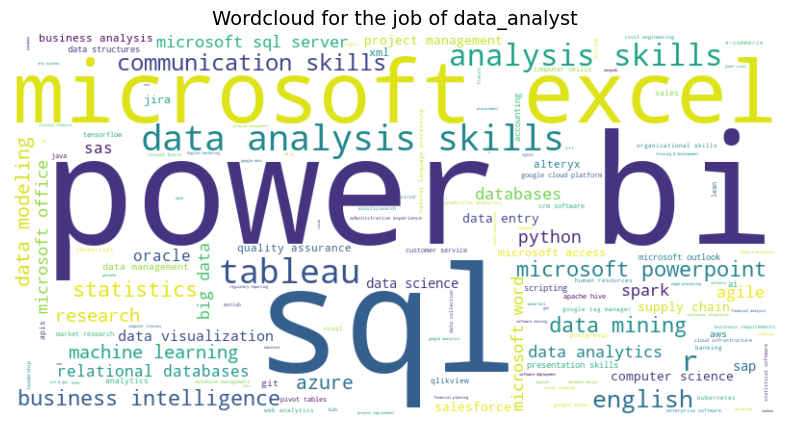

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


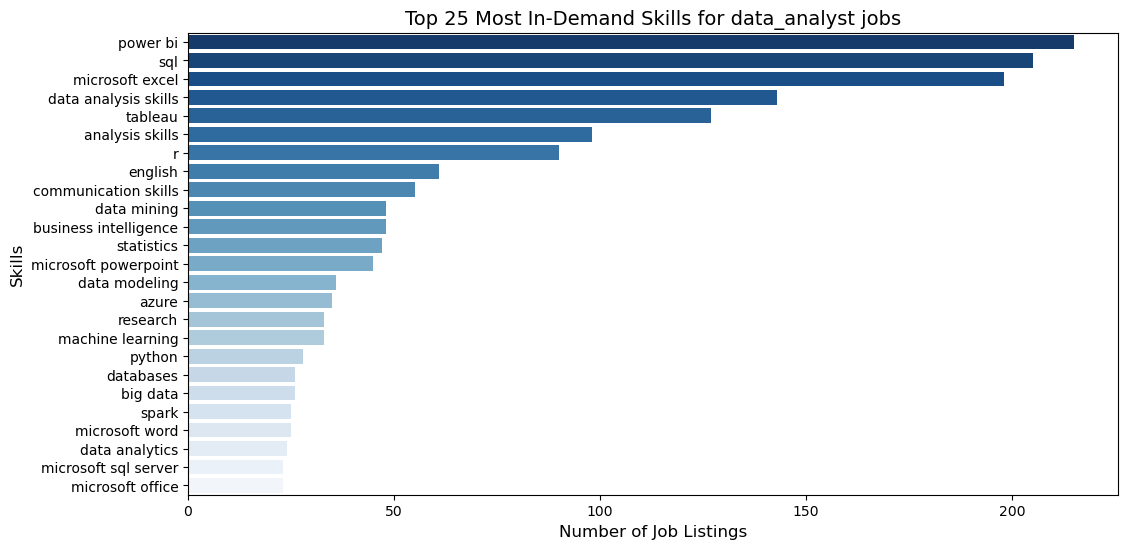

In [77]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [79]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                       company_name  salary_lpa
151                        Gridware        48.0
14                  Aditya Pharmacy        48.0
307                   Phenom People        48.0
318                        Proclink        48.0
254                MidTown Software        48.0
322     Pyramid Global Technologies        48.0
246            Maskoid Technologies        48.0
217  Keystone Universe of Education        48.0
199                       JASP Labs        48.0
378                         Squalas        48.0


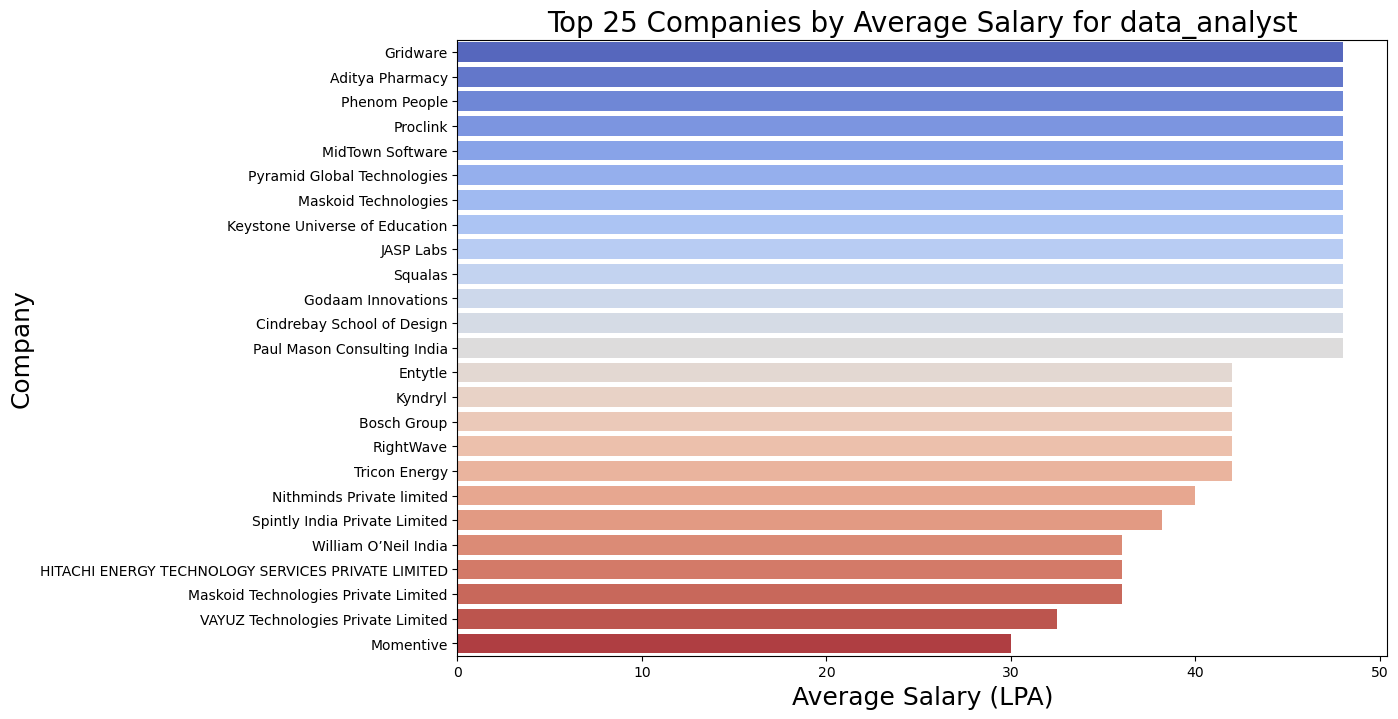

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

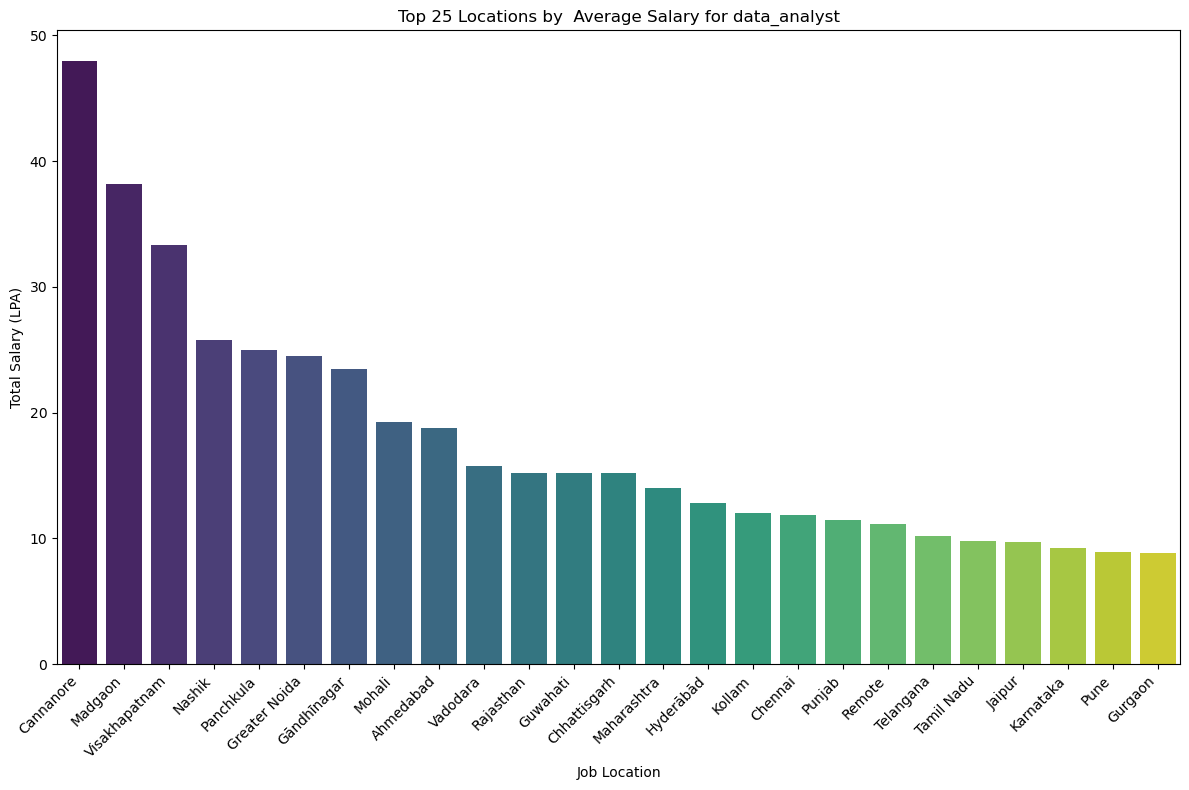

In [82]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

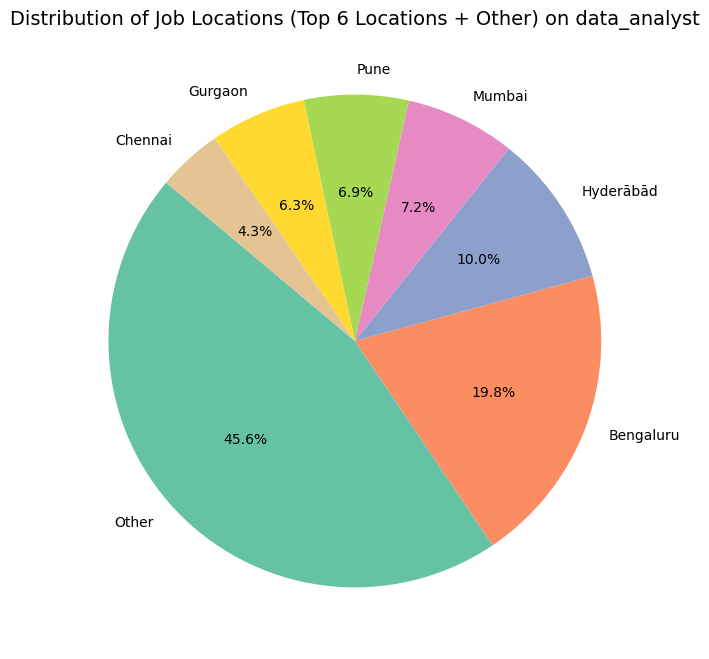

In [83]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

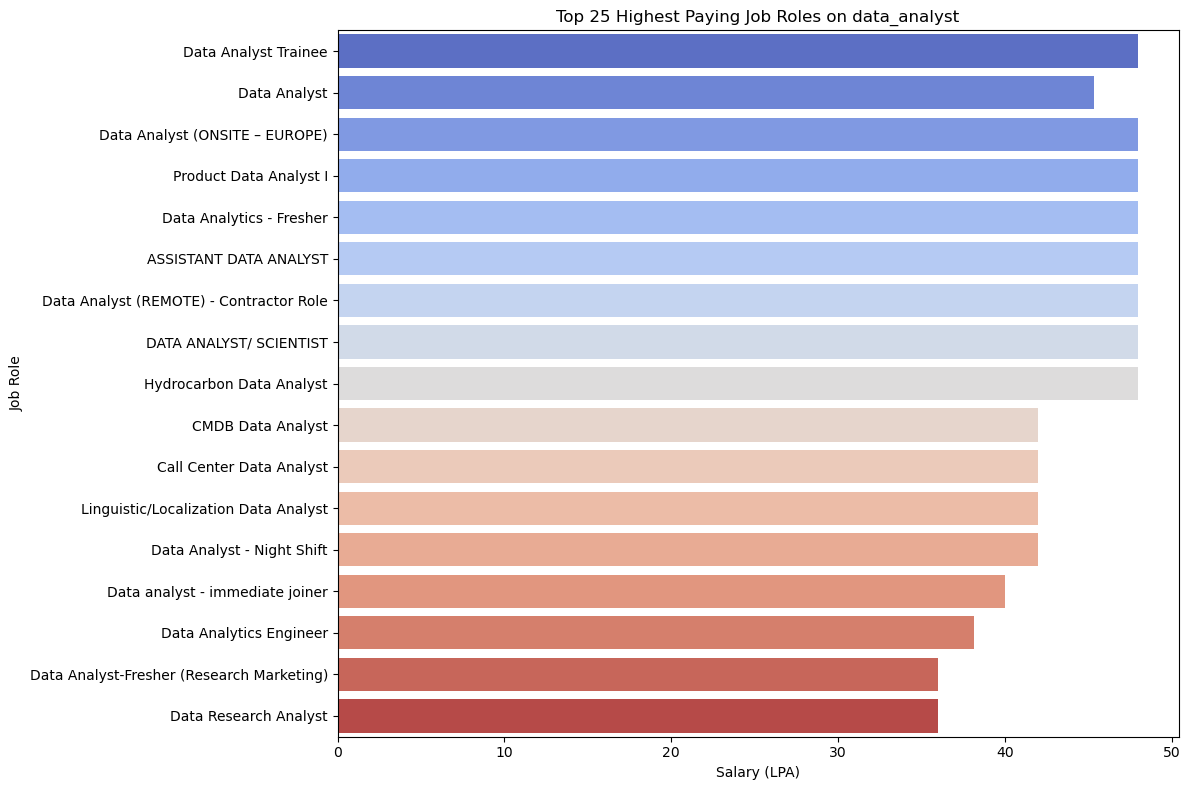

In [85]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [87]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_28092\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


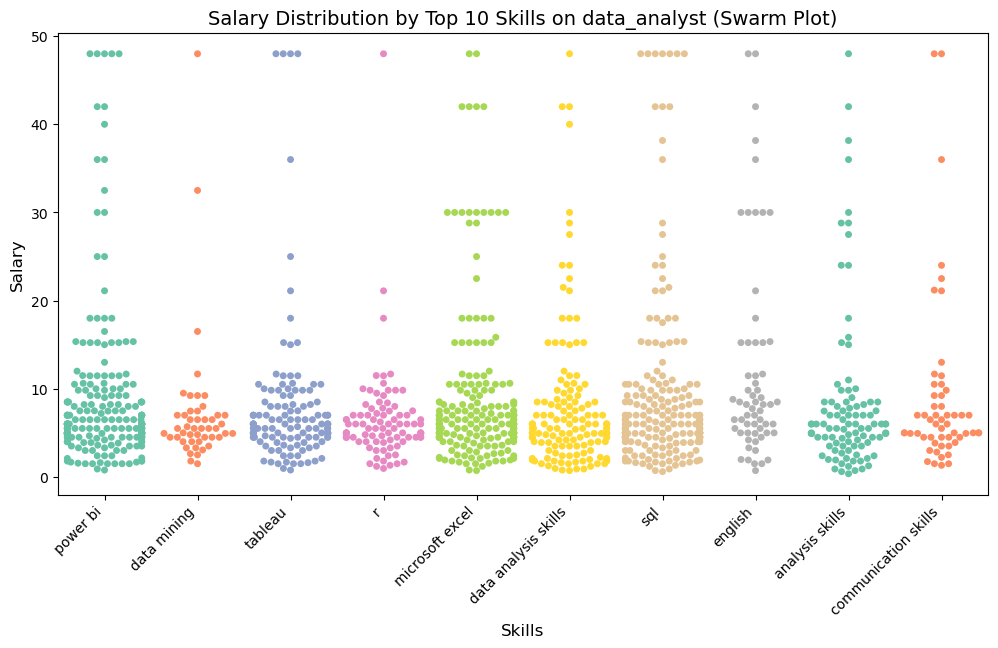

In [88]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

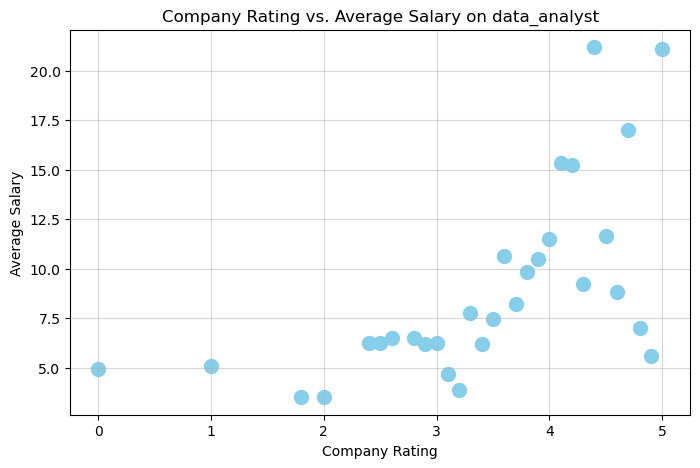

In [90]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [91]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.2648345636481549